<a href="https://colab.research.google.com/github/vanshbaba/Data-science/blob/main/Monster_com_preprocessed_Vansh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
jobs = pd.read_csv("/content/drive/MyDrive/Python projects/Preprocessing/monster_com-job_sample.csv")

In [ ]:
jobs.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [ ]:
print(jobs.size)# Total number of elements present in the data set
print(jobs.shape)# no. rows x no. columns
print(jobs.ndim) #Number of dimensions.

308000
(22000, 14)
2


In [ ]:
# Clean up the fields a bit
jobs = (jobs.drop(["job_board", "has_expired", "country", "country_code", "uniq_id"],
                  axis='columns'))

In [ ]:
jobs

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


In [ ]:
jobs = jobs[jobs['location'].str.len() < 40]

def map_yearly_salary_range(val):
    if pd.isnull(val):
        return np.nan
    elif "/year" in val:
        part = val.split("/year")[0].replace("$", " ").strip()
        if "-" in part:
            mn, mx = part.split("-")[0:2]
            try:
                mn = float(mn.replace(",", "").strip())
                mx = float(mx.replace(",", "").strip())
            except:
                return np.nan
            return mn, mx

We found 1653 yearly and 1048 hourly salaries in the dataset.


In [ ]:
def map_hourly_salary_range(val):
    if pd.isnull(val):
        return np.nan
    elif "/hour" in val:
        part = val.split("/hour")[0].replace("$", " ").strip()
        if "-" in part:
            mn, mx = part.split("-")[0:2]
            try:
                mn = float(mn.replace(",", "").strip())
                mx = float(mx.replace(",", "").strip())
            except:
                return np.nan
            return mn, mx
        
jobs = jobs.assign(yearly_salary_range=jobs['salary'].map(map_yearly_salary_range),
                   hourly_salary_range=jobs['salary'].map(map_hourly_salary_range))

In [ ]:
print("We found {0} yearly and {1} hourly salaries in the dataset.".format(
    jobs['yearly_salary_range'].notnull().sum(), jobs['hourly_salary_range'].notnull().sum()
))

In [ ]:
jobs

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector,yearly_salary_range,hourly_salary_range
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,NaN,NaN
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),NaN,NaN
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,NaN,NaN
5,NaN,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,"(120000.0, 160000.0)",None
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),"(45000.0, 60000.0)",None
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,NaN,NaN
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,None,"(25.0, 28.0)"


In [ ]:
jobs['job_type'] = jobs['job_type'].map(
    lambda j: j if pd.isnull(j) else 'Full Time' if 'Full Time' in j else 'Part Time' if 'Part Time' in j else 'Other'
)

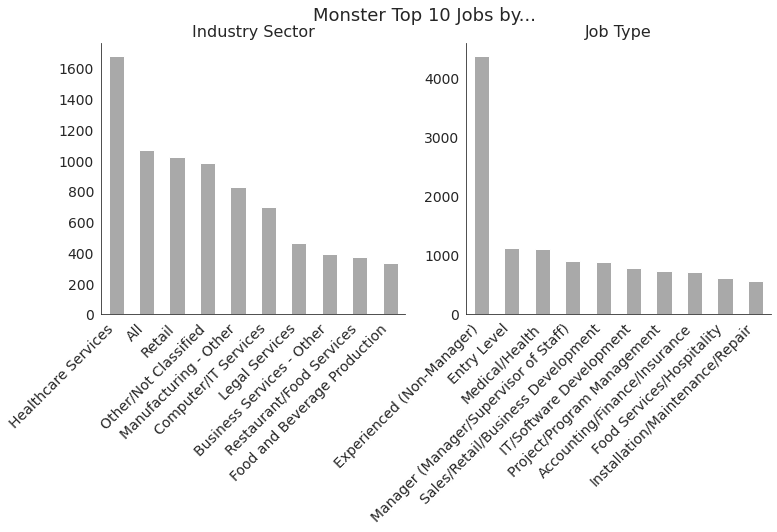

In [ ]:
# Creating the plot.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(1, 2, figsize=(12, 5))
f.subplots_adjust(hspace=1)
plt.suptitle('Monster Top 10 Jobs by...', fontsize=18)

bar_kwargs = {'fontsize': 14, 'color': 'darkgray'}

jobs['organization'].value_counts().head(10).plot.bar(ax=axarr[0], **bar_kwargs,
                                                      title='Industry Sector')
jobs['sector'].value_counts().head(10).plot.bar(ax=axarr[1], **bar_kwargs,
                                                         title='Job Type')

sns.despine()

for n in [0, 1]:
    axarr[n].title.set_fontsize(16)
    axarr[n].set_xticklabels(axarr[n].get_xticklabels(), 
                             rotation=45, ha='right', fontsize=14)

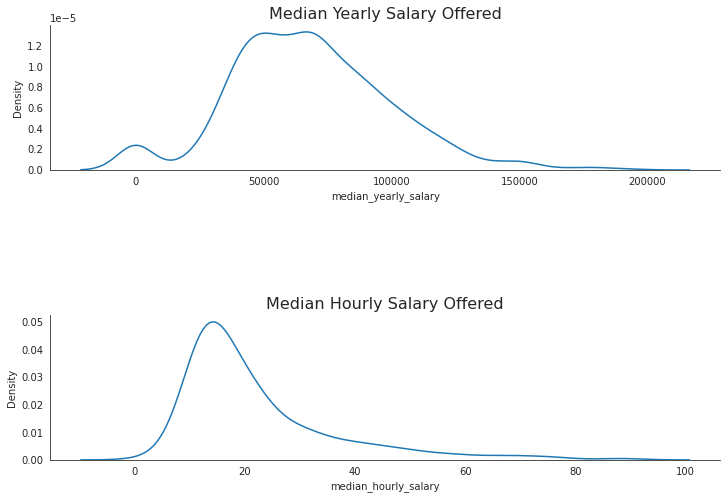

In [ ]:
f, axarr = plt.subplots(2, 1, figsize=(12, 8))
f.subplots_adjust(hspace=1)

bar_kwargs = {'fontsize': 14, 'color': 'darkgray'}

jobs = jobs.assign(
    median_yearly_salary = jobs['yearly_salary_range'].map(
        lambda r: (r[0] + r[1]) / 2 if pd.notnull(r) else r
    ),
    median_hourly_salary = jobs['hourly_salary_range'].map(
        lambda r: (r[0] + r[1]) / 2 if pd.notnull(r) else r
    )
)

sns.kdeplot(jobs[pd.notnull(jobs.median_yearly_salary)]['median_yearly_salary']\
                .where(lambda v: v < 200000), 
            ax=axarr[0]
)
sns.kdeplot(jobs[pd.notnull(jobs.hourly_salary_range)]['median_hourly_salary']\
                .where(lambda v: v < 100), 
            ax=axarr[1]
)

axarr[0].set_title("Median Yearly Salary Offered", fontsize=16)
axarr[1].set_title("Median Hourly Salary Offered", fontsize=16)

sns.despine()

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import defaultdict
from string import punctuation
from heapq import nlargest

class FrequencySummarizer:
  def __init__(self, min_cut=0.1, max_cut=0.9):
    """
     Initilize the text summarizer.
     Words that have a frequency term lower than min_cut 
     or higer than max_cut will be ignored.
    """
    self._min_cut = min_cut
    self._max_cut = max_cut 
    self._stopwords = set(stopwords.words('english') + list(punctuation))

  def _compute_frequencies(self, word_sent):
    """ 
      Compute the frequency of each of word.
      Input: 
       word_sent, a list of sentences already tokenized.
      Output: 
       freq, a dictionary where freq[w] is the frequency of w.
    """
    freq = defaultdict(int)
    for s in word_sent:
      for word in s:
        if word not in self._stopwords:
          freq[word] += 1
    # frequencies normalization and fitering
    m = float(max(freq.values()))
    for w in list(freq.keys()):
      freq[w] = freq[w]/m
      if freq[w] >= self._max_cut or freq[w] <= self._min_cut:
        del freq[w]
    return freq

  def summarize(self, text, n):
    """
      Return a list of n sentences 
      which represent the summary of text.
    """
    sents = sent_tokenize(text)
    
    try:
        assert n <= len(sents)
    except AssertionError:
        return ""
        
    word_sent = [word_tokenize(s.lower()) for s in sents]
    self._freq = self._compute_frequencies(word_sent)
    ranking = defaultdict(int)
    for i,sent in enumerate(word_sent):
      for w in sent:
        if w in self._freq:
          ranking[i] += self._freq[w]
    sents_idx = self._rank(ranking, n)    
    return [sents[j] for j in sents_idx]

  def _rank(self, ranking, n):
    """ return the first n sentences with highest ranking """
    return nlargest(n, ranking, key=ranking.get)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
" ".join(FrequencySummarizer().summarize(
    jobs.iloc[0].job_description.replace(".", ". ").replace("•", " "), 2)
)

"TeamSoft has been in business since 1996  TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project management  TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career move  TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar match  Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new position  Our longest running consultant has been with us for 16 years  Consultants can participate in our charitable giving committee. Required Skills:  Call tracking software  Phone based technical support  Problem documentation and communication  Remote Desktop Management Tools  Respond to customer requests  General understanding of LANDesk  Microsoft Office 2007 SuiteFind out why TeamSoft is the Madi

In [ ]:
stops = set(stopwords.words('english') + list(punctuation))

In [ ]:
summary_words = jobs.head(1000).job_description.map(lambda desc: set(
    word_tokenize(
        " ".join(
            FrequencySummarizer().summarize(desc.replace(".", ". ").replace("•", " "), 2)
        )
    )
) - stops
                                                     )
import itertools
# non_summary = pd.Series(list(itertools.chain.from_iterable(non_summary_words.values)))
summary = pd.Series(list(itertools.chain.from_iterable(summary_words.values)))

Text(0.5, 0.98, 'Top 10 Most Occurent Important Words in Job Descriptions')

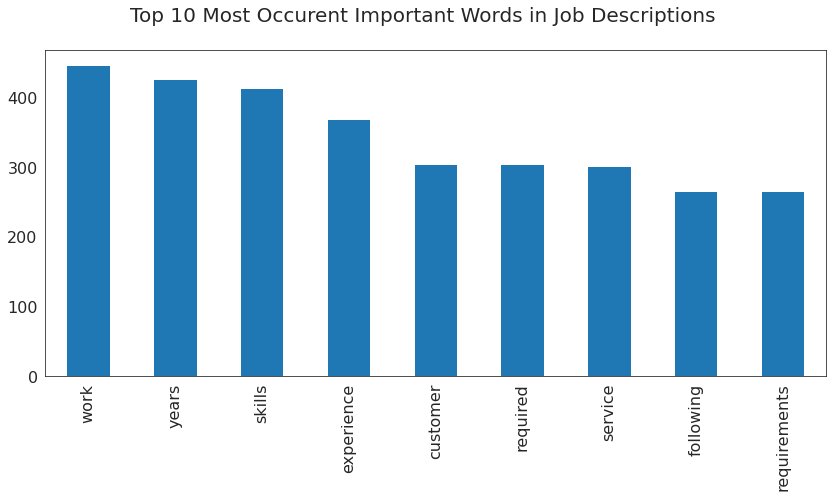

In [ ]:
import seaborn as sns
sns.set_style("white")

(summary
     .value_counts(ascending=False)
     .head(12)
     .drop(['Qualifications', 'meet', 'including'])
     .plot.bar(fontsize=16, figsize=(14, 6)))
plt.gcf().suptitle('Top 10 Most Occurent Important Words in Job Descriptions', fontsize=20)